In [1]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #graph library which uses matplotlib in background
import matplotlib.pyplot as plt
#Importing the data
df_credit =pd.read_csv("data.csv")
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [3]:
#Looking the unique values
print(df_credit.nunique())
#Looking the data
df_credit.head()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


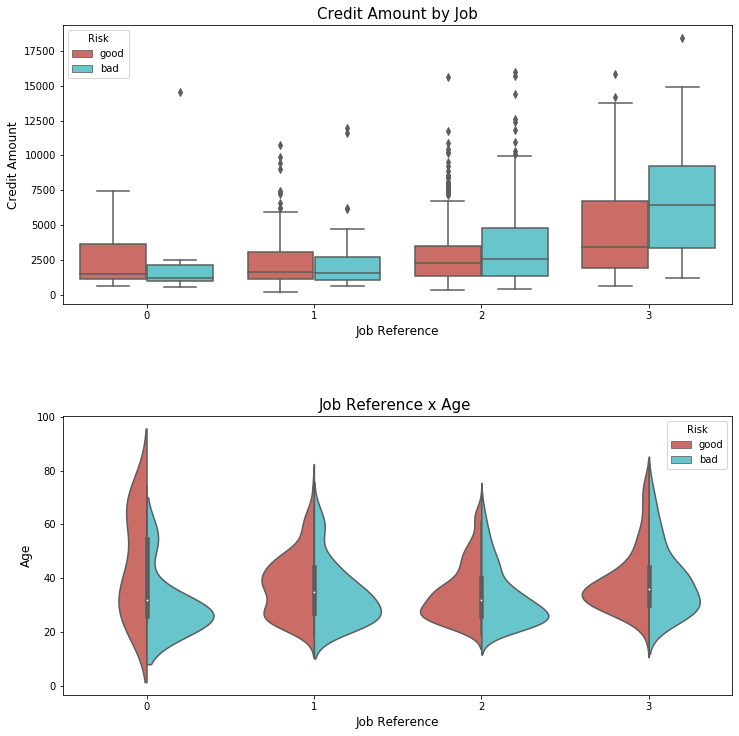

In [4]:
fig,ax = plt.subplots(figsize =(12,12),nrows = 2)
g1 = sns.boxplot(x = "Job",y="Credit amount",data = df_credit,palette = "hls",
                ax = ax[0],hue = "Risk")
g1.set_title("Credit Amount by Job",fontsize = 15)
g1.set_xlabel("Job Reference",fontsize = 12)
g1.set_ylabel("Credit Amount",fontsize = 12)
g2 = sns.violinplot(x = "Job",y = "Age",data =df_credit,ax = ax[1],hue = "Risk",
                   split = True,palette = "hls")
g2.set_title("Job Reference x Age ",fontsize = 15)
g2.set_xlabel("Job Reference",fontsize = 12)
g2.set_ylabel("Age",fontsize = 12)
plt.subplots_adjust(hspace = 0.4,top = 0.9)
plt.show()

Description of Distribution Savings accounts by Risk: 
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


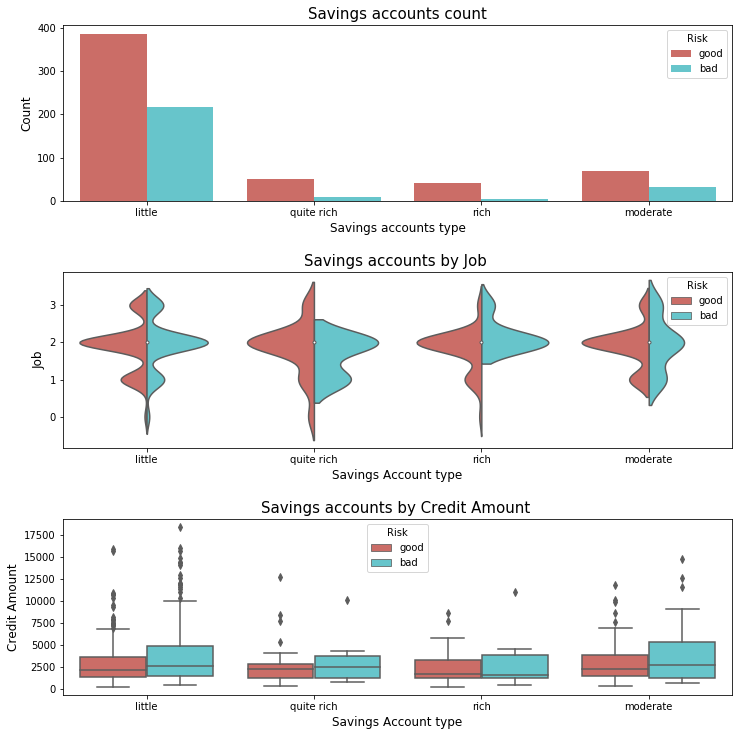

In [5]:
print("Description of Distribution Savings accounts by Risk: ")
print(pd.crosstab(df_credit["Saving accounts"],df_credit.Risk))
fig,ax = plt.subplots(3,1,figsize =(12,12))
g = sns.countplot(x = "Saving accounts",data = df_credit,palette = 'hls',
                 ax = ax[0],hue = "Risk")
g.set_title("Savings accounts count",fontsize = 15)
g.set_xlabel("Savings accounts type",fontsize = 12)
g.set_ylabel("Count",fontsize = 12)
g1 = sns.violinplot(x = "Saving accounts",y = "Job",data =df_credit,
                    ax = ax[1],hue = "Risk",
                   split = True,palette = "hls")
g1.set_title("Savings accounts by Job ",fontsize = 15)
g1.set_xlabel("Savings Account type",fontsize = 12)
g1.set_ylabel("Job",fontsize = 12)

g = sns.boxplot(x = "Saving accounts",y="Credit amount",
                data = df_credit,palette = "hls",
                ax = ax[2],hue = "Risk")
g.set_title("Savings accounts by Credit Amount ",fontsize = 15)
g.set_xlabel("Savings Account type",fontsize = 12)
g.set_ylabel("Credit Amount",fontsize = 12)
plt.subplots_adjust(hspace=0.4,top = 0.9)
plt.show()

Values describe:
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


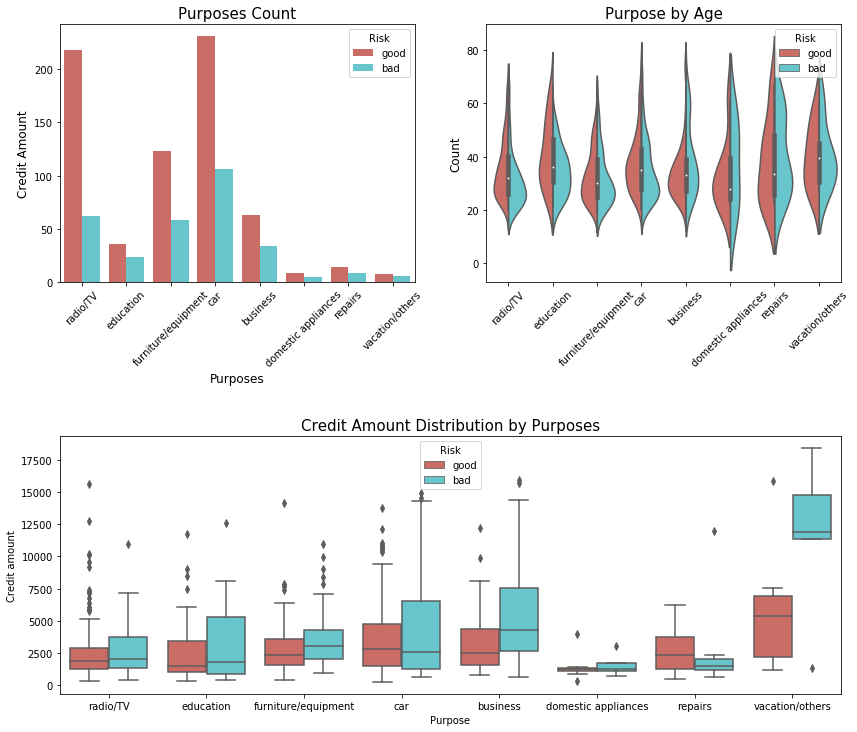

In [6]:
print("Values describe:")
print(pd.crosstab(df_credit.Purpose,df_credit.Risk))
plt.figure(figsize = (14,12))
plt.subplot(221)
g = sns.countplot(x = "Purpose",data = df_credit,palette = 'hls',
                 hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation = 45)
g.set_title("Purposes Count",fontsize = 15)
g.set_xlabel("",fontsize = 12)
g.set_ylabel("Count",fontsize = 12)
plt.subplot(222)
g1 = sns.violinplot(x = "Purpose",y = "Age",data =df_credit,
                    hue = "Risk",
                   split = True,palette = "hls")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
g1.set_title("Purpose by Age",fontsize = 15)
g1.set_xlabel("",fontsize = 12)
g1.set_ylabel("Count",fontsize = 12)
plt.subplot(212)
g2 = sns.boxplot(x = "Purpose",y="Credit amount",
                data = df_credit,palette = "hls",
                hue = "Risk")
g2.set_title("Credit Amount Distribution by Purposes",fontsize = 15)
g.set_xlabel("Purposes",fontsize = 12)
g.set_ylabel("Credit Amount",fontsize = 12)
plt.subplots_adjust(hspace=0.6,top = 0.9)
plt.show()

Total values of the most missing variable:
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


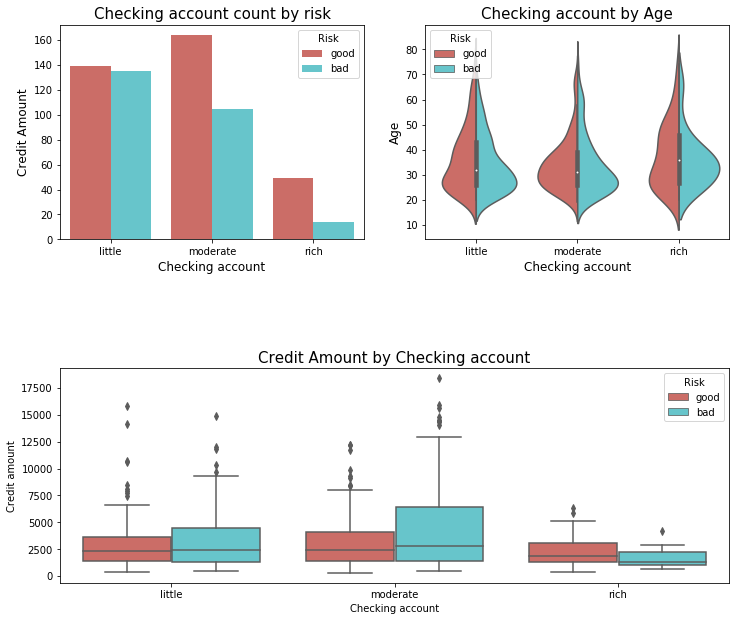

In [7]:
print("Total values of the most missing variable:")
print(df_credit.groupby("Checking account")["Checking account"].count())
plt.figure(figsize = (12,10))
g = plt.subplot(221)
g = sns.countplot(x = "Checking account",data = df_credit,palette = 'hls',
                 hue = "Risk")
g.set_title("Checking account count by risk",fontsize = 15)
g.set_xlabel("Checking acccount",fontsize = 12)
g.set_ylabel("Count",fontsize = 12)
g1 = plt.subplot(222)
g1 = sns.violinplot(x = "Checking account",y = "Age",data =df_credit,
                    hue = "Risk",
                   split = True,palette = "hls")
g1.set_title("Checking account by Age",fontsize = 15)
g1.set_xlabel("Checking account",fontsize = 12)
g1.set_ylabel("Age",fontsize = 12)
plt.subplot(212)
g2 = sns.boxplot(x = "Checking account",y="Credit amount",
                data = df_credit,palette = "hls",
                hue = "Risk")
g2.set_title("Credit Amount by Checking account",fontsize = 15)
g.set_xlabel("Checking account",fontsize = 12)
g.set_ylabel("Credit Amount",fontsize = 12)
plt.subplots_adjust(wspace = 0.2,hspace=0.6,top = 0.9)
plt.show()
plt.show()

In [8]:
print(pd.crosstab(df_credit.Sex,df_credit.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


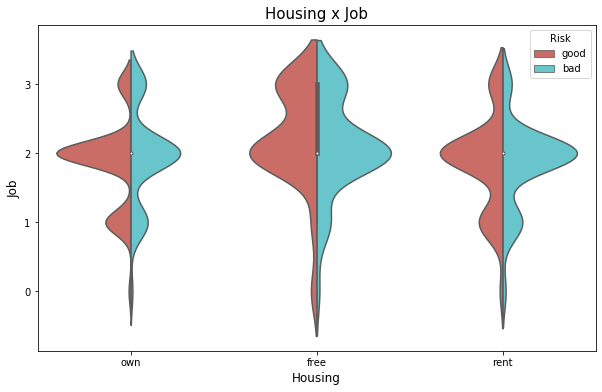

In [9]:
plt.figure(figsize = (10,6))
g = sns.violinplot(x = "Housing",y = "Job",data=df_credit,hue = "Risk",
                  palette = 'hls',split = True)
g.set_title("Housing x Job",fontsize = 15)
g.set_xlabel("Housing",fontsize = 12)
g.set_ylabel("Job",fontsize = 12)
plt.show()

In [10]:
print(pd.crosstab(df_credit["Checking account"],df_credit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [14]:
d = ['Purpose','Sex']
cm = sns.light_palette("blue",as_cmap = True)
pd.crosstab(df_credit[d[0]],df_credit[d[1]]).style.background_gradient
                                                            (cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [17]:
interval = (18,25,35,60,120)
cats = ['Student','Young','Adult','Senior']
df_credit['Age_cat'] = pd.cut(df_credit.Age,interval,labels=cats)
print('Purpose:',df_credit.Purpose.unique())
print('Sex:',df_credit.Sex.unique())
print('Housing:',df_credit.Housing.unique())
print('Saving accounts:',df_credit['Saving accounts'].unique())
print("Risk:",df_credit["Risk"].unique())
print("Checking account:",df_credit["Checking account"].unique())
print("Age_cat:",df_credit['Age_cat'].unique())

Purpose: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex: ['male' 'female']
Housing: ['own' 'free' 'rent']
Saving accounts: [nan 'little' 'quite rich' 'rich' 'moderate']
Risk: ['good' 'bad']
Checking account: ['little' 'moderate' nan 'rich']
Age_cat: [Senior, Student, Adult, Young]
Categories (4, object): [Student < Young < Adult < Senior]


In [19]:
def one_hot_encoder(df,nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype =='object']
    df = pd.get_dummies(df,columns = categorical_columns,dummy_na = 
                       nan_as_category,drop_first = True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df,new_columns

df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose,drop_first = True,
                                          prefix = 'Purpose'),left_index = True,
                           right_index = True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex,drop_first = True,
                                          prefix = 'Sex'),left_index = True,
                           right_index = True)
#Hosuing
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing,drop_first = True,
                                          prefix = 'Housing'),left_index = True,
                           right_index = True)
#Housing get Saving account
df_credit = df_credit.merge(pd.get_dummies(df_credit['Saving accounts'],
                                           drop_first = True,
                                          prefix = 'Savings'),left_index = True,
                           right_index = True)
#Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk,
                                          prefix = 'Risk'),left_index = True,
                           right_index = True)
#Housing get Checking account
df_credit = df_credit.merge(pd.get_dummies(df_credit['Checking account'],
                                           drop_first = True,
                                          prefix = 'Check'),left_index = True,
                           right_index = True)
#Housing get Age Categories
df_credit = df_credit.merge(pd.get_dummies(df_credit['Age_cat'],
                                           drop_first = True,
                                          prefix = 'Age_cat'),left_index = True,
                           right_index = True)

In [21]:
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit["Risk_good"]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RF: 0.289826 (0.064206)


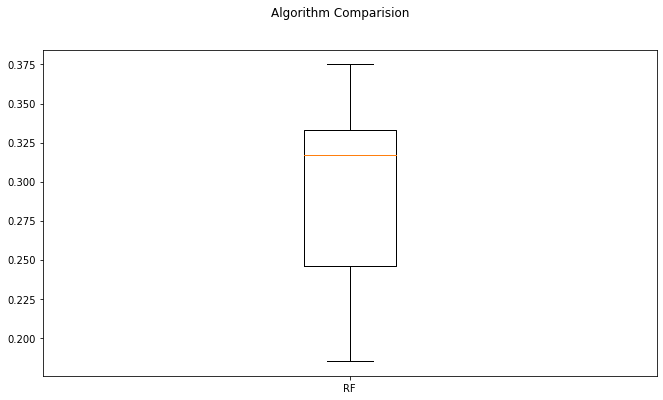

In [25]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,\
                        fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])
#Create X and y variables
X = df_credit.drop('Risk_bad',1).values
y = df_credit["Risk_bad"].values
#Splitting X and y into train and test version
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,
                                                 random_state = 42)
seed = 7
#prepare models
models =[]
models.append(('RF',RandomForestClassifier()))

#evaluate each model in turn
results = []
names = []
scoring = 'recall'
#k-fold CV , training set is split into 'k' smaller sets
for name,model in models:
    kfold = KFold(n_splits = 10,random_state = seed)
    cv_results = cross_val_score(model,X_train,y_train,cv = kfold,
                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)
#boxplot
fig = plt.figure(figsize = (11,6))
fig.suptitle('Algorithm Comparision')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
param_grid = {'max_depth':[3,5,7,10,None],
             'n_estimators':[3,5,10,25,50,150],
             'max_features':[4,7,15,20]}

#creating the classifier
model = RandomForestClassifier(random_state = 2)
grid_search = GridSearchCV(model,param_grid=param_grid,cv=5,\
                          scoring = 'recall',verbose = 4,n_jobs = -1)
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 593 out of 600 | elapsed:   41.6s remaining:    0.4s


0.4650434782608695
{'max_depth': None, 'max_features': 15, 'n_estimators': 3}


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   43.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
rf = RandomForestClassifier(max_depth = None,max_features = 15,n_estimators = 3,\
                           random_state=2)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(accuracy_score(y_test,y_pred))

[[146  32]
 [ 36  36]]


0.728
